In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys

# Add the project's files to the python path
# file_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))  # for .py script
file_path = os.path.dirname(os.path.abspath(""))  # for .ipynb notebook
sys.path.append(file_path)
import warnings
import numpy as np

warnings.simplefilter("ignore", category=np.exceptions.VisibleDeprecationWarning)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
from sklearn.cluster import KMeans
import maxflow
from graph_cut import *

## Step 1: Compute unary and pairwise terms to observe initialize segmentation

(576, 720, 3)
labels (576, 720)


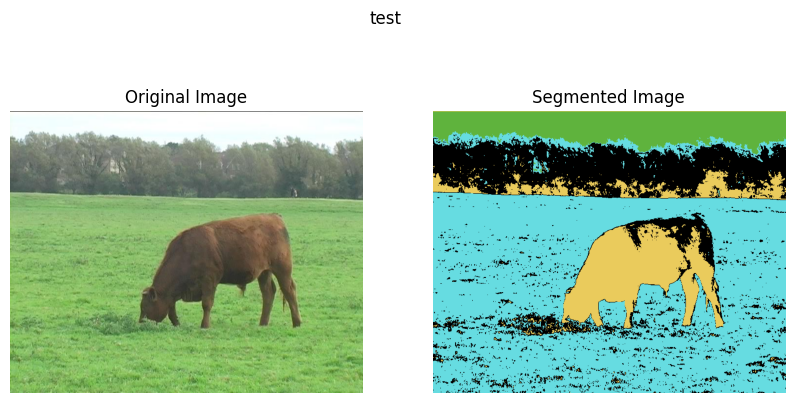

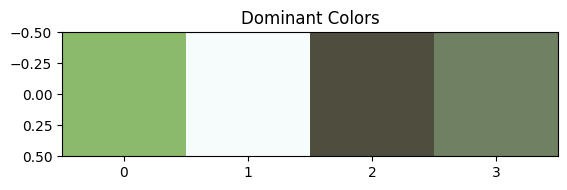

In [2]:
image_path = "../images/cow.ppm"  # Replace with actual image path
K = 4
image = load_image(image_path)
print(image.shape)
labels = initialize_labels_bis(image, K=K, method="kmeans")
print("labels", labels.shape)
show_segmentation(image, labels, title="test")
show_dominant_colors(labels=labels, image=image, K=K)

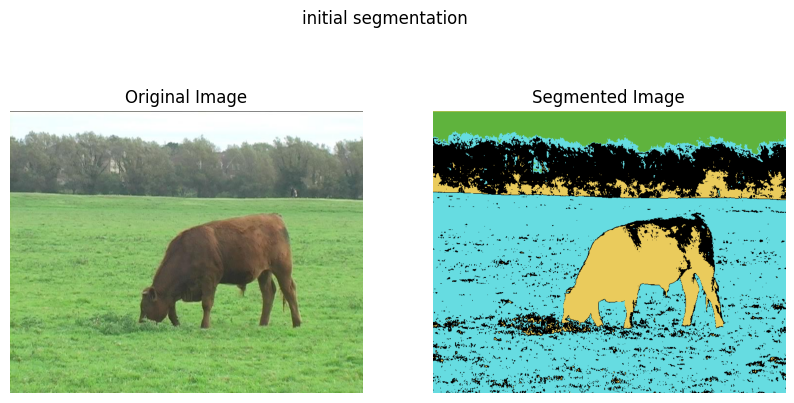

In [3]:
image_path = "../images/cow.ppm"  # Replace with actual image path
K = 4
image = load_image(image_path)
labels = initialize_labels_bis(image, K=K, method="kmeans")
show_segmentation(image, labels, title="initial segmentation")

histograms = compute_histograms(image, labels, K=K, bins=16)
unary_term = compute_unary_term(image, labels, histograms, K, 16)
# dominants_colors=get_dominant_colors(labels=labels, image=image, K=K)
# unary_term = compute_unary_term_L2(image,dominants_colors)
pairwise_term = compute_pairwise_term(image, K=K, lambda_val=200)

## Step 2 : Run only the recycle step

In [4]:
from graph_cut.recycle import *

In [5]:
unary_term_recycled = unary_recycle(unary_term, 0, K)
unary_term_recycled.shape

(576, 720, 2)

In [6]:
pairwise_term_recycled = binary_recycle(pairwise_term, K)

In [7]:
from graph_cut.recycle import Recycle

recycling = Recycle(image=image, unary=unary_term, pairwise=pairwise_term, K=K)

---start Projection---


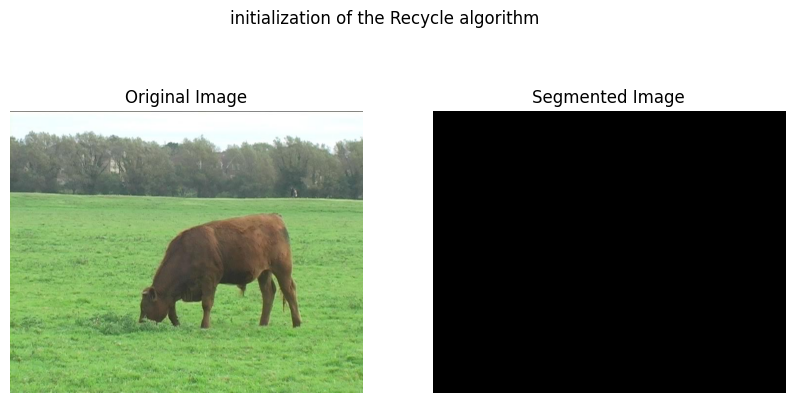

alpha 0


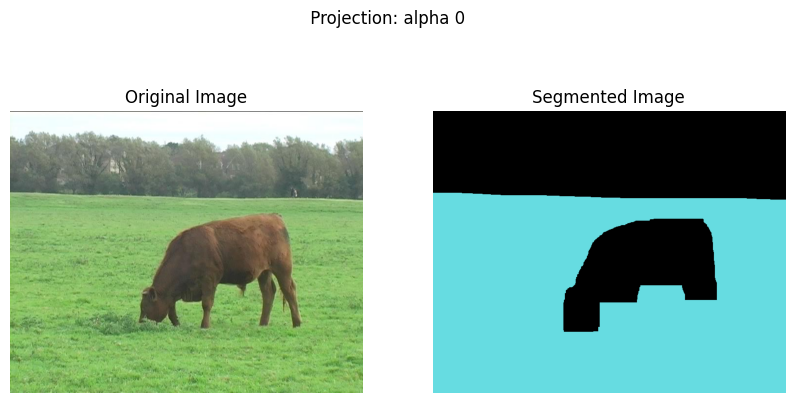

alpha 1


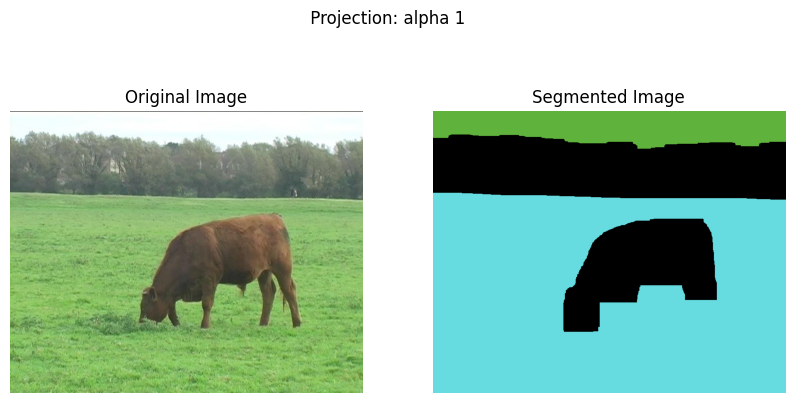

alpha 2


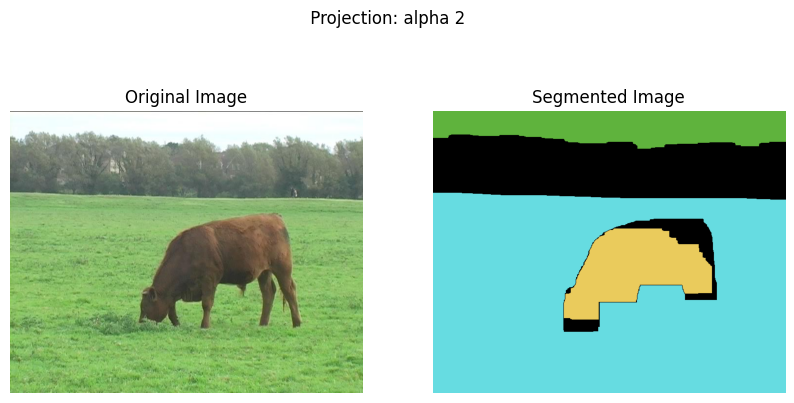

alpha 3


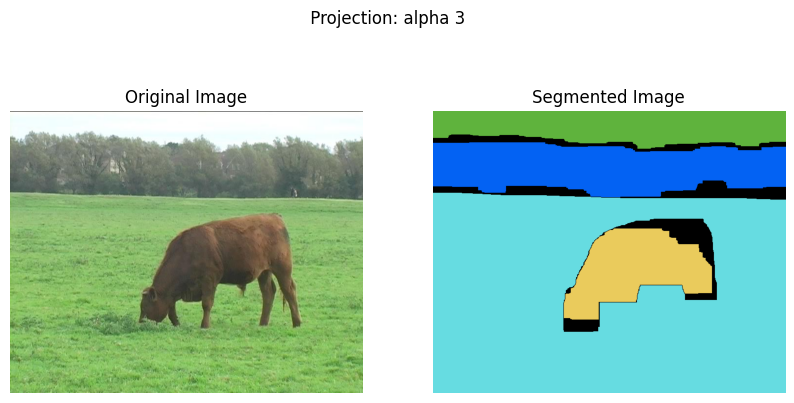

In [8]:
recycling = Recycle(image=image, unary=unary_term, pairwise=pairwise_term, K=K)

init_assigment = np.zeros((image.shape[0], image.shape[1])) * -1  #! No assignement
labels, assigned_labels, cst, unary, pairwise = recycling.run(
    image=image,
)

## Step 3: Now add recycle and Alpha Expansion

In [9]:
from graph_cut.Alpha_recycling import Alpha_and_recycle

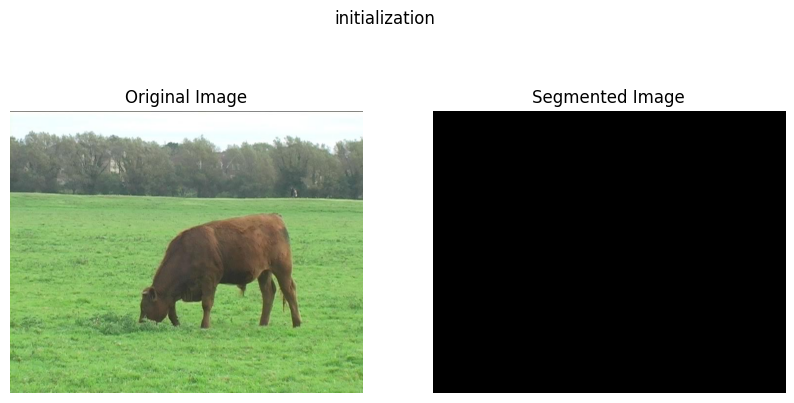

first energy 5799091.273797794
---start Projection---


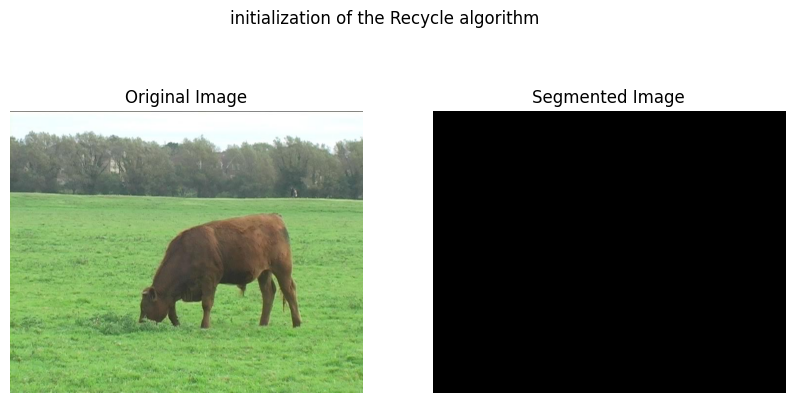

alpha 0


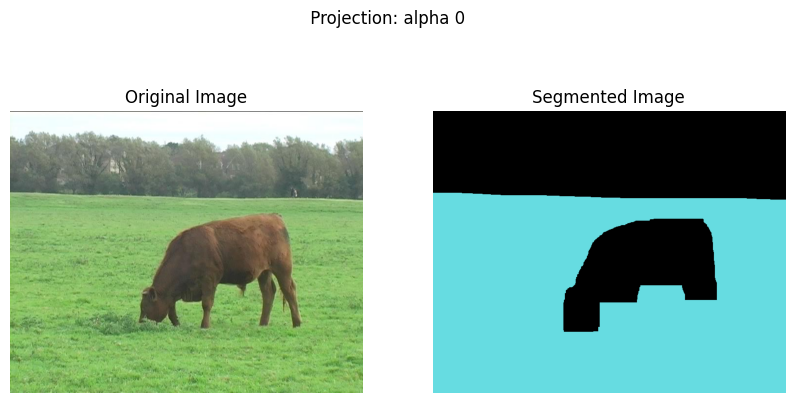

alpha 1


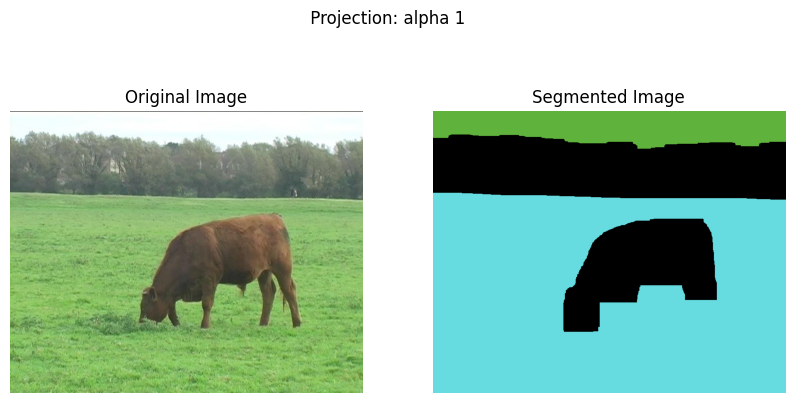

alpha 2


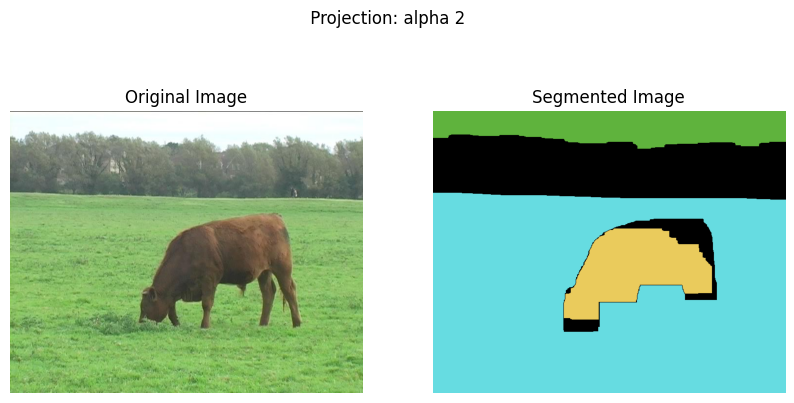

alpha 3


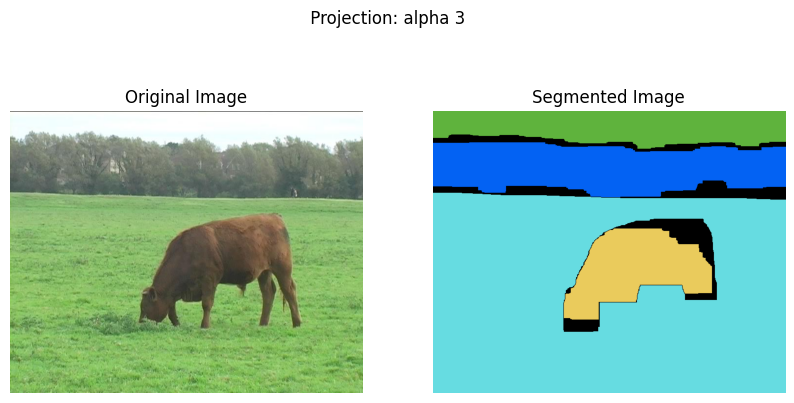

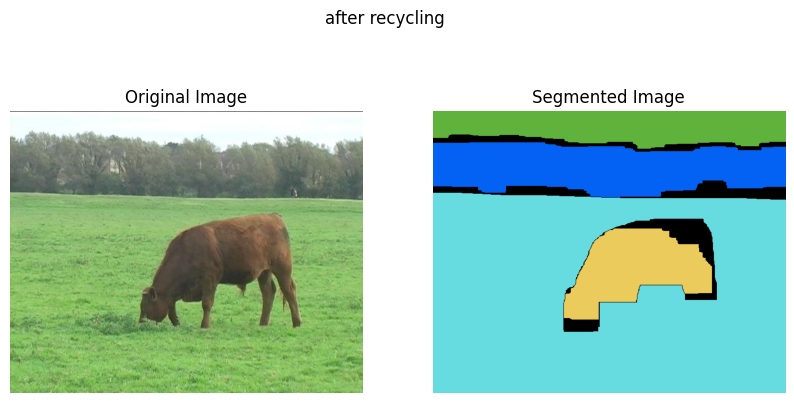

after recycling None


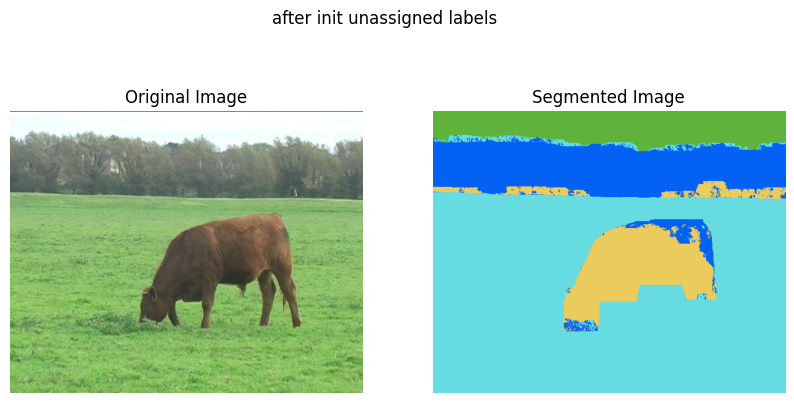

after init unassigned labels None


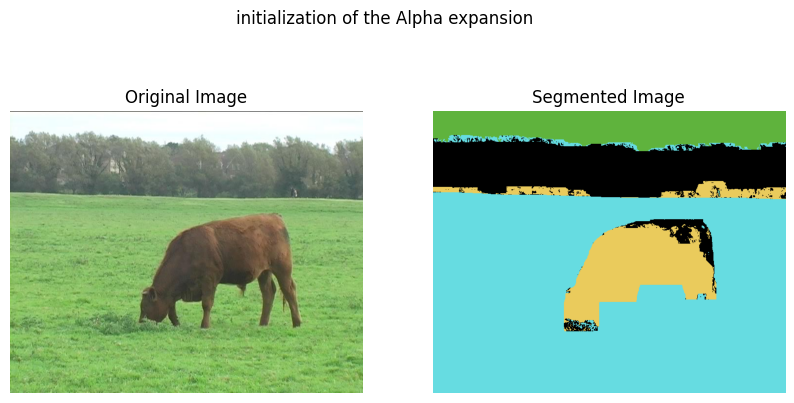

first energy 3570876.612860227
iterations nb: 0
computed energy 2720340.0972318156 is it greater than initial energy? False


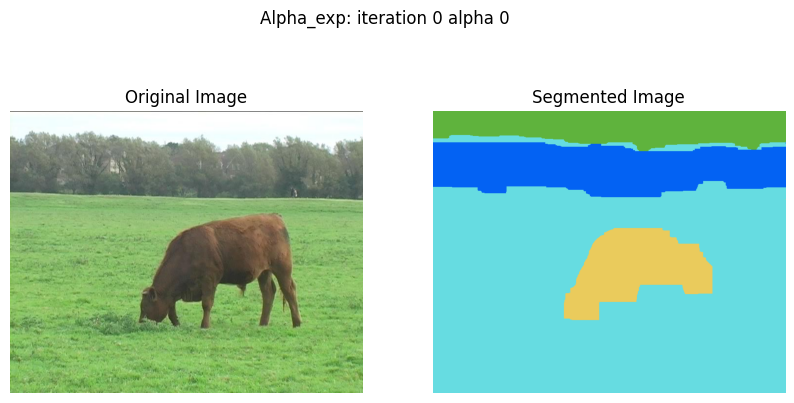

energy 2720340.0972318156
computed energy 2631511.604965378 is it greater than initial energy? False


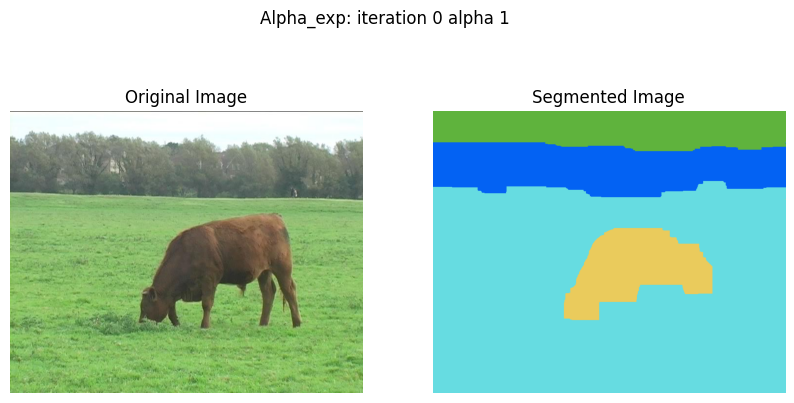

energy 2631511.604965378
computed energy 2676666.284901715 is it greater than initial energy? True
computed energy 2396685.842205453 is it greater than initial energy? False


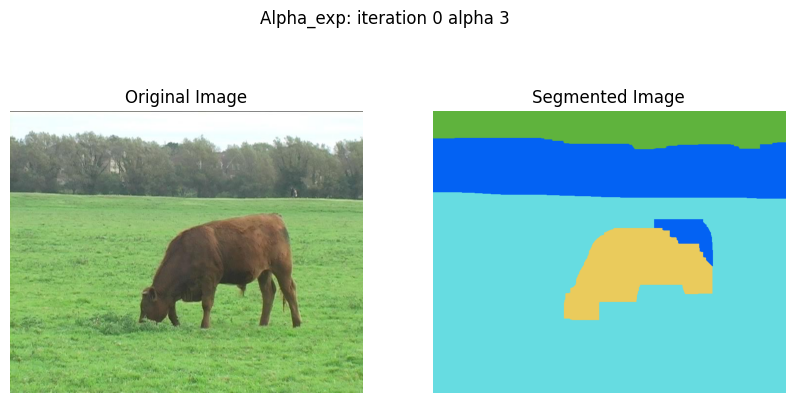

energy 2396685.842205453
iterations nb: 1
computed energy 2396685.842205453 is it greater than initial energy? False
computed energy 2396576.4812805164 is it greater than initial energy? False


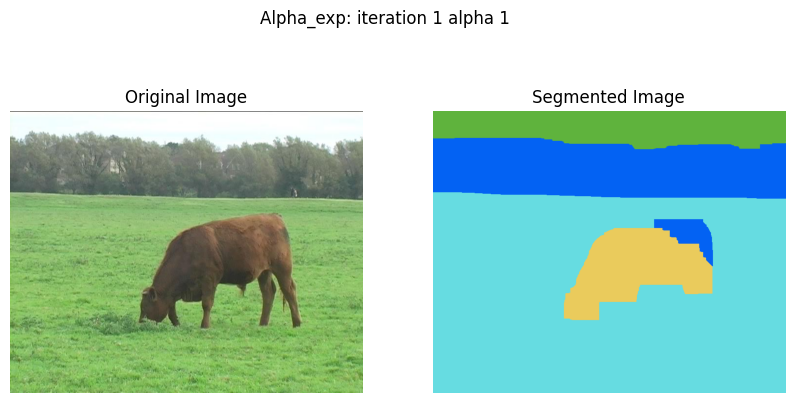

energy 2396576.4812805164
computed energy 2390849.9073263737 is it greater than initial energy? False


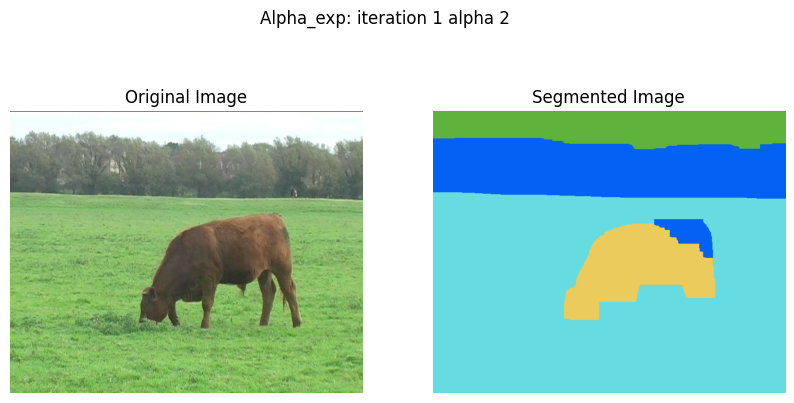

energy 2390849.9073263737
computed energy 2390849.9073263737 is it greater than initial energy? False
iterations nb: 2
computed energy 2390836.5072217733 is it greater than initial energy? False


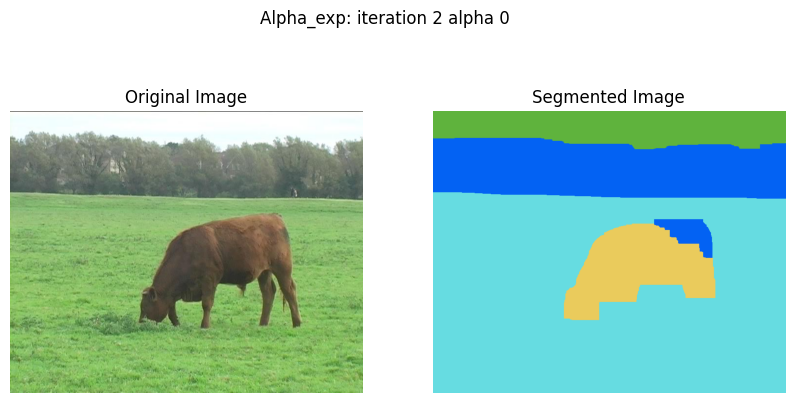

energy 2390836.5072217733
computed energy 2390836.5072217733 is it greater than initial energy? False
computed energy 2390825.5159491794 is it greater than initial energy? False


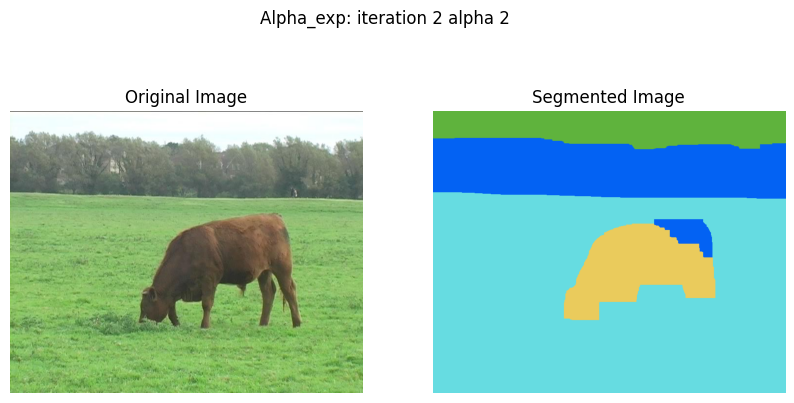

energy 2390825.5159491794
computed energy 2390825.5159491794 is it greater than initial energy? False
iterations nb: 3
computed energy 2390825.5159491794 is it greater than initial energy? False
computed energy 2390825.515949179 is it greater than initial energy? False


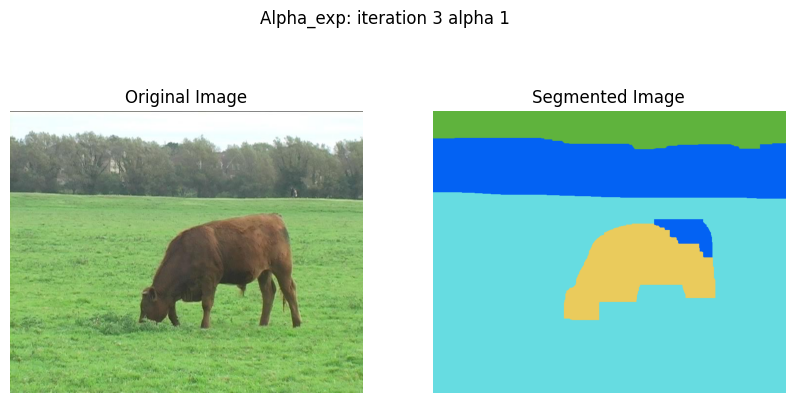

energy 2390825.515949179
computed energy 2390825.515949179 is it greater than initial energy? False
computed energy 2390825.515949179 is it greater than initial energy? False
final energy 2390825.515949179


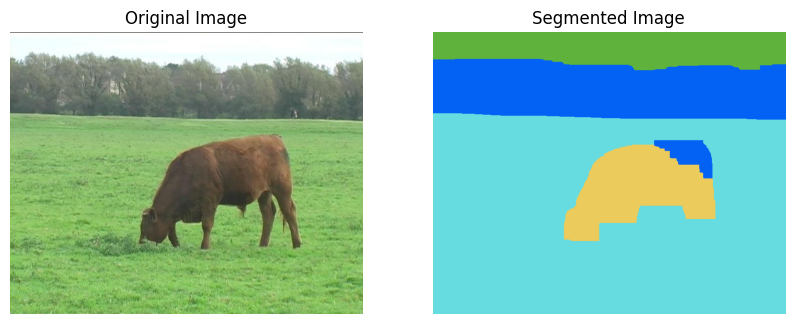

final segmentation None


In [10]:
Final_algo = Alpha_and_recycle(
    image=image, unary=unary_term, pairwise=pairwise_term, K=K, max_iterations=4
)

labels, assigned_labels = Final_algo.run(image=image)